✅Installing Yfinance Library

In [139]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import datetime

✅Loading and Inspecting the Data

In [115]:
import yfinance as yf
tsla_info=yf.Ticker("TSLA")
tsla_info.info


{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive; and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehic

In [116]:
tsla=yf.Ticker("TSLA")
tsla=tsla.history(start="2024-08-01", end="2024-11-30")
print(tsla)

                                 Open        High         Low       Close  \
Date                                                                        
2024-08-01 00:00:00-04:00  227.690002  231.869995  214.330002  216.860001   
2024-08-02 00:00:00-04:00  214.880005  216.130005  205.779999  207.669998   
2024-08-05 00:00:00-04:00  185.220001  203.880005  182.000000  198.880005   
2024-08-06 00:00:00-04:00  200.750000  202.899994  192.669998  200.639999   
2024-08-07 00:00:00-04:00  200.770004  203.490005  191.479996  191.759995   
...                               ...         ...         ...         ...   
2024-11-22 00:00:00-05:00  341.089996  361.529999  337.700012  352.559998   
2024-11-25 00:00:00-05:00  360.140015  361.929993  338.200012  338.589996   
2024-11-26 00:00:00-05:00  341.000000  346.959991  335.660004  338.230011   
2024-11-27 00:00:00-05:00  341.799988  342.549988  326.589996  332.890015   
2024-11-29 00:00:00-05:00  336.079987  345.450012  334.649994  345.160004   

In [117]:
tsla.index

DatetimeIndex(['2024-08-01 00:00:00-04:00', '2024-08-02 00:00:00-04:00',
               '2024-08-05 00:00:00-04:00', '2024-08-06 00:00:00-04:00',
               '2024-08-07 00:00:00-04:00', '2024-08-08 00:00:00-04:00',
               '2024-08-09 00:00:00-04:00', '2024-08-12 00:00:00-04:00',
               '2024-08-13 00:00:00-04:00', '2024-08-14 00:00:00-04:00',
               '2024-08-15 00:00:00-04:00', '2024-08-16 00:00:00-04:00',
               '2024-08-19 00:00:00-04:00', '2024-08-20 00:00:00-04:00',
               '2024-08-21 00:00:00-04:00', '2024-08-22 00:00:00-04:00',
               '2024-08-23 00:00:00-04:00', '2024-08-26 00:00:00-04:00',
               '2024-08-27 00:00:00-04:00', '2024-08-28 00:00:00-04:00',
               '2024-08-29 00:00:00-04:00', '2024-08-30 00:00:00-04:00',
               '2024-09-03 00:00:00-04:00', '2024-09-04 00:00:00-04:00',
               '2024-09-05 00:00:00-04:00', '2024-09-06 00:00:00-04:00',
               '2024-09-09 00:00:00-04:00', '2024-0

✅Handling Missing Values

In [118]:
tsla.isnull().sum()


Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [119]:
tsla.reset_index(inplace=True)


In [120]:
tsla.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-08-01 00:00:00-04:00,227.690002,231.869995,214.330002,216.860001,83861900,0.0,0.0
1,2024-08-02 00:00:00-04:00,214.880005,216.130005,205.779999,207.669998,82880100,0.0,0.0
2,2024-08-05 00:00:00-04:00,185.220001,203.880005,182.000000,198.880005,100308800,0.0,0.0
3,2024-08-06 00:00:00-04:00,200.750000,202.899994,192.669998,200.639999,73783900,0.0,0.0
4,2024-08-07 00:00:00-04:00,200.770004,203.490005,191.479996,191.759995,71159800,0.0,0.0


In [121]:
tsla.info()
tsla.drop("Dividends",axis=1,inplace=True)
tsla.drop("Stock Splits",axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          85 non-null     datetime64[ns, America/New_York]
 1   Open          85 non-null     float64                         
 2   High          85 non-null     float64                         
 3   Low           85 non-null     float64                         
 4   Close         85 non-null     float64                         
 5   Volume        85 non-null     int64                           
 6   Dividends     85 non-null     float64                         
 7   Stock Splits  85 non-null     float64                         
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1)
memory usage: 5.4 KB


In [122]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype                           
---  ------  --------------  -----                           
 0   Date    85 non-null     datetime64[ns, America/New_York]
 1   Open    85 non-null     float64                         
 2   High    85 non-null     float64                         
 3   Low     85 non-null     float64                         
 4   Close   85 non-null     float64                         
 5   Volume  85 non-null     int64                           
dtypes: datetime64[ns, America/New_York](1), float64(4), int64(1)
memory usage: 4.1 KB


<Axes: >

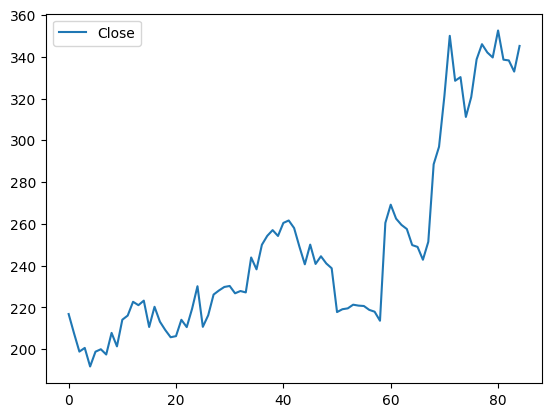

In [123]:
tsla.plot.line(y="Close",use_index=True)

In [124]:
tsla["Tomorrow"]=tsla["Close"].shift(-1)
tsla

,Date,Open,High,Low,Close,Volume,Tomorrow
0,2024-08-01 00:00:00-04:00,227.690002,231.869995,214.330002,216.860001,83861900,207.669998
1,2024-08-02 00:00:00-04:00,214.880005,216.130005,205.779999,207.669998,82880100,198.880005
2,2024-08-05 00:00:00-04:00,185.220001,203.880005,182.000000,198.880005,100308800,200.639999
3,2024-08-06 00:00:00-04:00,200.750000,202.899994,192.669998,200.639999,73783900,191.759995
4,2024-08-07 00:00:00-04:00,200.770004,203.490005,191.479996,191.759995,71159800,198.839996
...,...,...,...,...,...,...,...
80,2024-11-22 00:00:00-05:00,341.089996,361.529999,337.700012,352.559998,89140700,338.589996
81,2024-11-25 00:00:00-05:00,360.140015,361.929993,338.200012,338.589996,95890900,338.230011
82,2024-11-26 00:00:00-05:00,341.000000,346.959991,335.660004,338.230011,62295900,332.890015
83,2024-11-27 00:00:00-05:00,341.799988,342.549988,326.589996,332.890015,57896400,345.160004


In [125]:
tsla["Target"]=(tsla["Tomorrow"]>tsla["Close"].astype(int))
tsla.head()

,Date,Open,High,Low,Close,Volume,Tomorrow,Target
0,2024-08-01 00:00:00-04:00,227.690002,231.869995,214.330002,216.860001,83861900,207.669998,False
1,2024-08-02 00:00:00-04:00,214.880005,216.130005,205.779999,207.669998,82880100,198.880005,False
2,2024-08-05 00:00:00-04:00,185.220001,203.880005,182.000000,198.880005,100308800,200.639999,True
3,2024-08-06 00:00:00-04:00,200.750000,202.899994,192.669998,200.639999,73783900,191.759995,False
4,2024-08-07 00:00:00-04:00,200.770004,203.490005,191.479996,191.759995,71159800,198.839996,True


In [126]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
tsla_features = tsla[features]

Normalization of Data

In [127]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(tsla_features)

In [128]:
X, y = [], []
window_size = 10

In [129]:
for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i - window_size:i])
    y.append(scaled_data[i, 3])  

In [130]:
X, y = np.array(X), np.array(y)

In [131]:
X = X.reshape(X.shape[0], -1)  

In [132]:
tsla["Target"] = tsla["Close"].shift(-1)
tsla = tsla.dropna()

In [133]:
predictors = ["Open", "High", "Low", "Close", "Volume"]
X = tsla[predictors]
y = tsla["Target"]

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [136]:
rf_model = RandomForestRegressor(n_estimators=100,max_depth=10,random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [137]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

train_preds = rf_model.predict(X_train)
test_preds = rf_model.predict(X_test)

print("Training Metrics:")
print(f"MAE: {mean_absolute_error(y_train, train_preds)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, train_preds))}")

print("\nTest Metrics:")
print(f"MAE: {mean_absolute_error(y_test, test_preds)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, test_preds))}")

Training Metrics:
MAE: 2.8407862501578793
RMSE: 4.115805421656796

Test Metrics:
MAE: 71.85481189503389
RMSE: 73.66037291309091


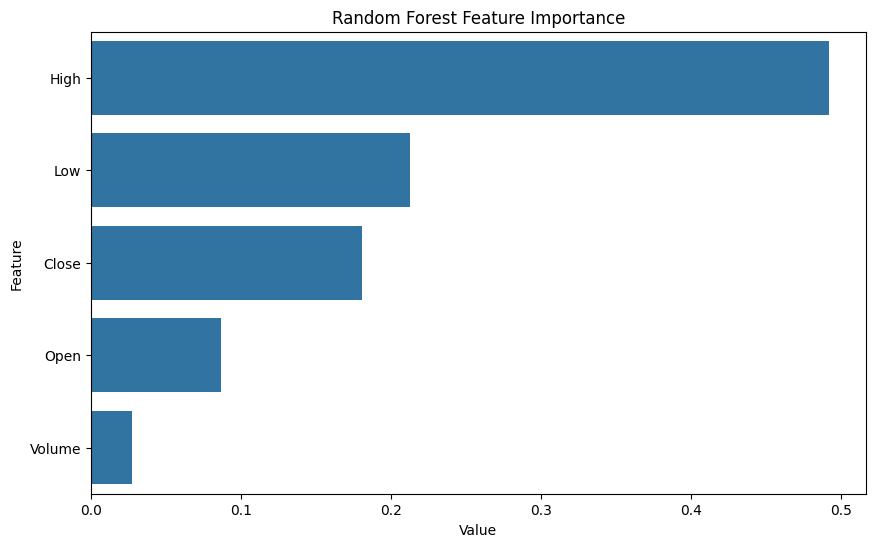

In [141]:
importances = rf_model.feature_importances_
feature_names = X.columns

feature_imp = pd.DataFrame(sorted(zip(importances, feature_names)),columns=['Value','Feature'])
plt.figure(figsize=(10,6))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Random Forest Feature Importance')
plt.show()


In [142]:
dec_data = yf.download("TSLA", start="2024-12-01", end="2024-12-15")

dec_processed = dec_data[["Open", "High", "Low", "Close", "Volume"]]

dec_predictions = rf_model.predict(dec_processed[predictors])

results = pd.DataFrame({
    "Actual": dec_data["Close"],
    "Predicted": dec_predictions
})
print(results)

[*********************100%***********************]  1 of 1 completed
C:\Users\rijub\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: Data must be 1-dimensional, got ndarray of shape (10, 1) instead

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(results.index, results['Actual'], label='Actual Prices')
plt.plot(results.index, results['Predicted'], label='Predicted Prices')
plt.title("Tesla Stock Price Prediction: December 2024")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()